In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [53]:
df = pd.read_csv('./data/adult.txt', header=None, names = ['age', 'workclass','fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race'\
, 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k'])

In [54]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  50k             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
y = df['50k'] = df['50k'].apply(lambda x: 1 if x == ' >50K' else 0)
x = df.iloc[:, :14]

In [33]:
x = pd.get_dummies(x)

In [34]:
y = tf.keras.utils.to_categorical(y)

In [35]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [38]:
x_train.shape

(22792, 108)

In [39]:
# deep learning model을 생성하고 

In [40]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=108))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))  # multi_classification
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               27904     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 56)                7224      
                                                                 
 dropout_6 (Dropout)         (None, 56)                0         
                                                                 
 dense_8 (Dense)             (None, 28)               

In [41]:
model.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer='adam')

In [42]:
hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs=50, batch_size=20)

Epoch 1/50
912/912 [==============================] - 2s 1ms/step - loss: 0.3924 - accuracy: 0.8205 - val_loss: 0.3249 - val_accuracy: 0.8491
Epoch 2/50
912/912 [==============================] - 1s 1ms/step - loss: 0.3468 - accuracy: 0.8413 - val_loss: 0.3104 - val_accuracy: 0.8561
Epoch 3/50
912/912 [==============================] - 1s 1ms/step - loss: 0.3349 - accuracy: 0.8466 - val_loss: 0.3063 - val_accuracy: 0.8557
Epoch 4/50
912/912 [==============================] - 1s 1ms/step - loss: 0.3264 - accuracy: 0.8504 - val_loss: 0.3072 - val_accuracy: 0.8601
Epoch 5/50
912/912 [==============================] - 1s 1ms/step - loss: 0.3200 - accuracy: 0.8526 - val_loss: 0.3120 - val_accuracy: 0.8601
Epoch 6/50
912/912 [==============================] - 1s 1ms/step - loss: 0.3160 - accuracy: 0.8531 - val_loss: 0.3075 - val_accuracy: 0.8620
Epoch 7/50
912/912 [==============================] - 1s 1ms/step - loss: 0.3140 - accuracy: 0.8567 - val_loss: 0.3062 - val_accuracy: 0.8568
Epoch 

In [46]:
model.evaluate(x_test_sc, y_test)

306/306 [==============================] - 0s 757us/step - loss: 0.5097 - accuracy: 0.8457


[0.5096869468688965, 0.8457365036010742]

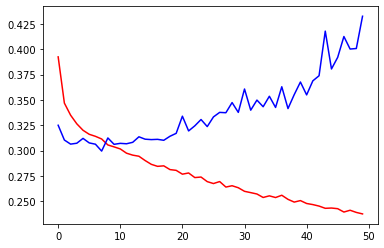

In [47]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')

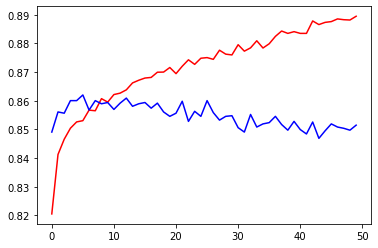

In [48]:
plt.plot(hist.history['accuracy'], c='r')
plt.plot(hist.history['val_accuracy'], c='b')

In [57]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train_sc, y_train)
rfc.score(x_test_sc, y_test)

0.8502405568635479